In [48]:
import pandas as pd
import numpy as np 

df = pd.read_csv('/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv')

print("This is the start of the data")
print(df.head())

print("This is the end of the data")
print(df.tail())

This is the start of the data
    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [49]:
print(df.isnull().sum())

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64


In [50]:
import statsmodels.api as sm

X = df[['top_speed_kmh', 'battery_capacity_kWh', 'efficiency_wh_per_km']]
Y = df['range_km']

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               range_km   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          2.24e-238
Time:                        22:30:34   Log-Likelihood:                -2339.8
No. Observations:                 478   AIC:                             4688.
Df Residuals:                     474   BIC:                             4704.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  140.8219 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

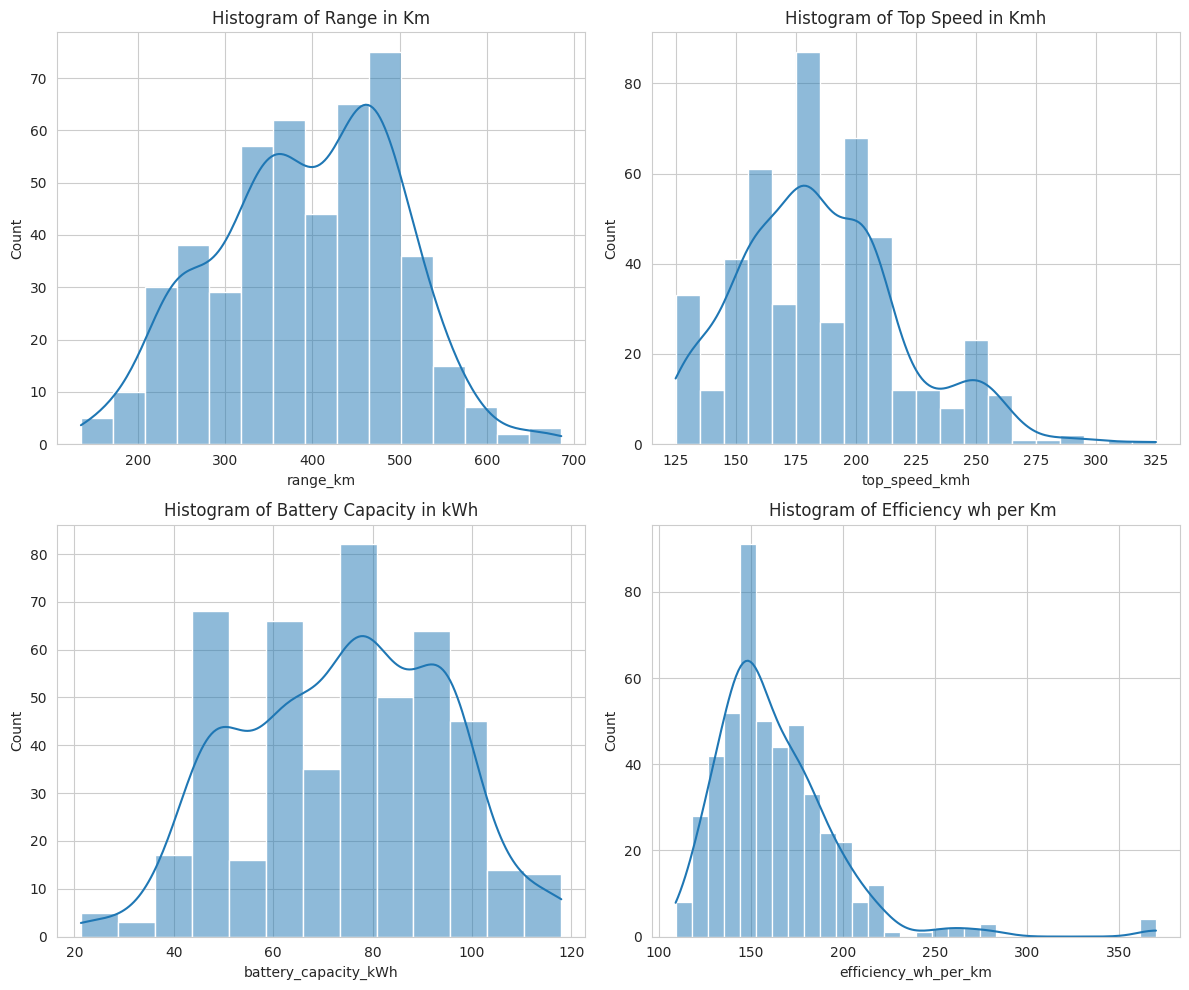

In [51]:
# HISTOGRAMS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.histplot(data=df, x = 'range_km', ax=axes[0,0], kde=True)
axes[0,0].set_title("Histogram of Range in Km") 

sns.histplot(data=df, x = 'top_speed_kmh', ax=axes[0, 1], kde=True)
axes[0,1].set_title("Histogram of Top Speed in Kmh")

sns.histplot(data=df, x = 'battery_capacity_kWh', ax=axes[1,0], kde=True)
axes[1,0].set_title("Histogram of Battery Capacity in kWh")

sns.histplot(data=df, x = 'efficiency_wh_per_km', ax=axes[1,1], kde=True)
axes[1,1].set_title("Histogram of Efficiency wh per Km ")




plt.tight_layout()

plt.show()

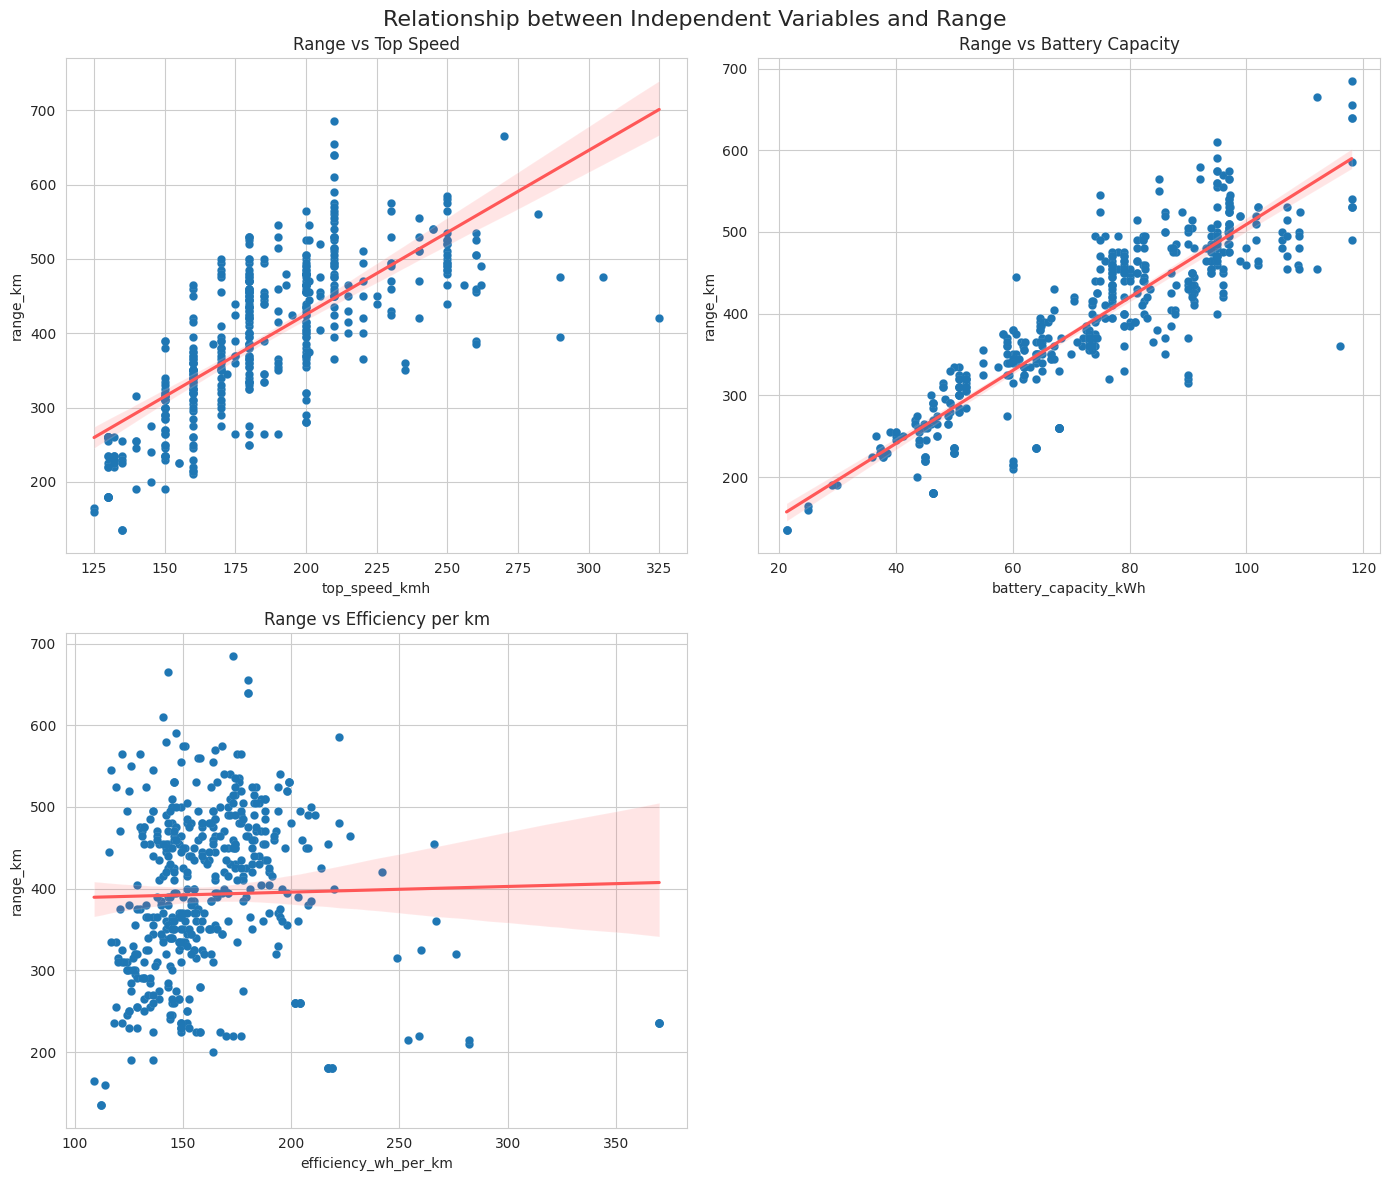

In [52]:
# SCATTERPLOTS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dependent_variable = 'range_km'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle("Relationship between Independent Variables and Range", fontsize=16)

sns.set_style("whitegrid")

# sns.set_style("dark", rc={'axes.edgecolor': 'black'})

x_var_1 = 'top_speed_kmh'
sns.scatterplot(data=df, x=x_var_1, y=dependent_variable,ax=axes[0,0])
sns.regplot(data=df, x=x_var_1, y=dependent_variable, ax=axes[0,0], line_kws={"color": "#ff5757"}, scatter_kws={'s':25, 'alpha': 0.8})
axes[0,0].set_title("Range vs Top Speed")

x_var_2 = 'battery_capacity_kWh'
sns.scatterplot(data=df, x=x_var_2, y=dependent_variable, ax=axes[0,1])
sns.regplot(data=df, x=x_var_2, y=dependent_variable, ax=axes[0,1], line_kws={"color":"#ff5757"}, scatter_kws={'s':25, 'alpha':0.8})
axes[0,1].set_title("Range vs Battery Capacity")

x_var_3 = 'efficiency_wh_per_km'
sns.scatterplot(data=df, x=x_var_3, y=dependent_variable, ax=axes[1,0])
sns.regplot(data=df, x=x_var_3, y=dependent_variable, ax=axes[1,0], line_kws={"color": "#ff5757"}, scatter_kws={'s':25, 'alpha': 0.8})
axes[1,0].set_title("Range vs Efficiency per km")

fig.delaxes(axes[1,1])




plt.tight_layout()
plt.show()

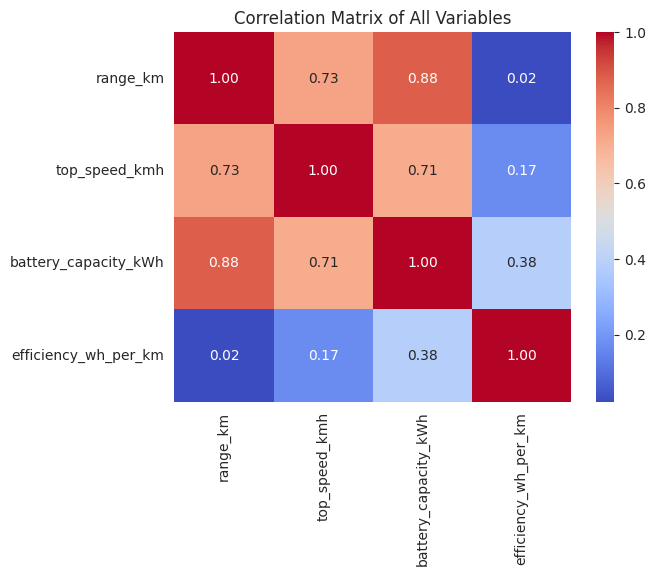

In [53]:
#HEATMAP

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix=df[['range_km', 'top_speed_kmh', 'battery_capacity_kWh', "efficiency_wh_per_km"]].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Matrix of All Variables")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

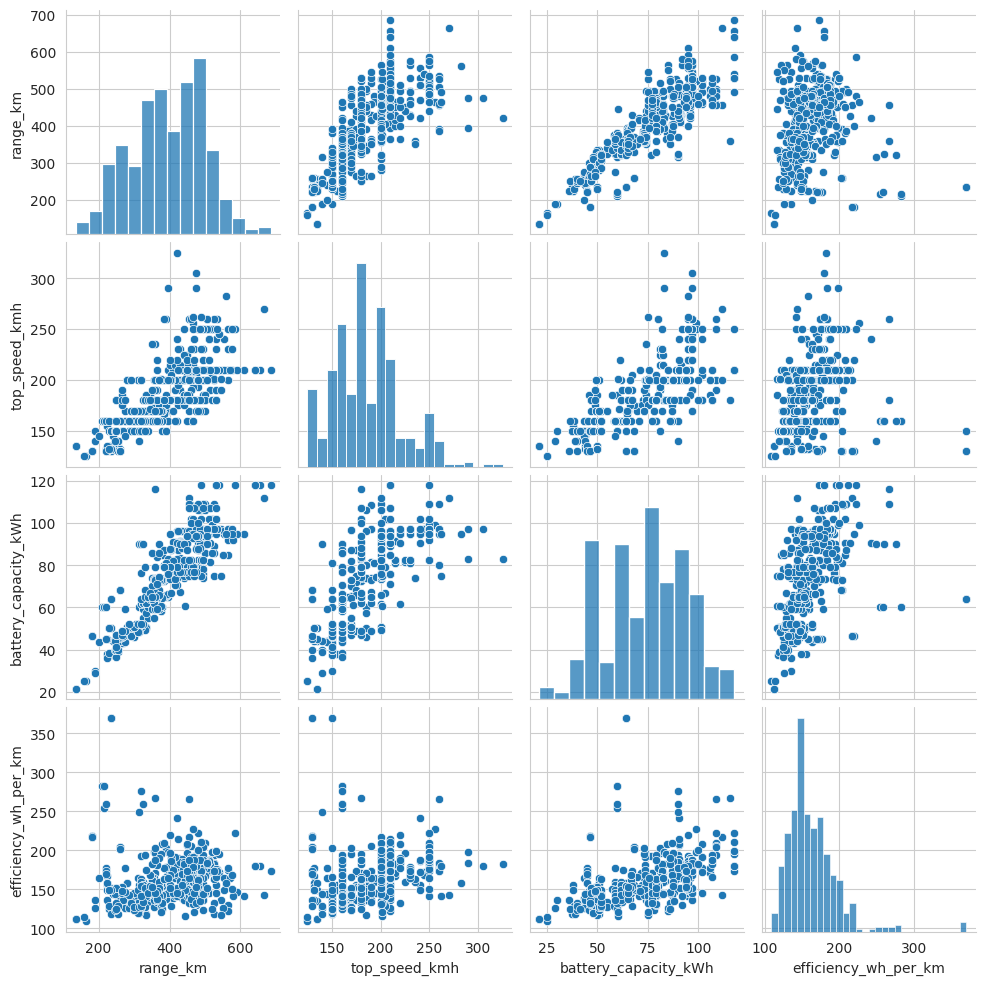

In [54]:
#PAIR PLOT

variables_to_plot= [
    'range_km',
    'top_speed_kmh',
    'battery_capacity_kWh',
    'efficiency_wh_per_km'
]

sns.pairplot(df[variables_to_plot])

plt.show()
